In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 #batch size
virsion = 1 #version number

In [ ]:
#!pip install -Uqq fastai fastbook nbdev
!pip install -Uqq fastai fastbook nbdev --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.5 MB/s eta 0:00:00
ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. T

In [ ]:
#importing fastai for creating datablock
from fastai import*
from fastai.vision.all import *
from fastbook import *

In [ ]:
!pip install --upgrade fastai
from fastai.data.block import DataBlock # DataBlock was moved to fastai.data.block

In [ ]:
#Mount the Google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Select the Diroctory to save files
%cd /content/drive/MyDrive/Mastercourse/Food Image Classification

/content/drive/MyDrive/Mastercourse/Food Image Classification


In [ ]:
#download dataset directy from kaggle
!pip install kaggle

In [ ]:
!kaggle datasets download -d harishkumardatalab/food-image-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/food-image-classification-dataset
License(s): CC0-1.0
 99% 1.67G/1.68G [00:28<00:00, 46.3MB/s]
100% 1.68G/1.68G [00:28<00:00, 63.8MB/s]


In [ ]:
%cd /content/drive/MyDrive/Mastercourse/Food Image Classification

/content/drive/MyDrive/Mastercourse/Food Image Classification


In [ ]:
!unzip -n food-image-classification-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Food Classification dataset/idli/277.jpg  
  inflating: Food Classification dataset/idli/278.jpg  
  inflating: Food Classification dataset/idli/280.jpg  
  inflating: Food Classification dataset/idli/282.jpg  
  inflating: Food Classification dataset/idli/283.jpg  
  inflating: Food Classification dataset/idli/284.jpg  
  inflating: Food Classification dataset/idli/285.jpg  
  inflating: Food Classification dataset/idli/286.jpg  
  inflating: Food Classification dataset/idli/287.jpg  
  inflating: Food Classification dataset/idli/288.jpg  
  inflating: Food Classification dataset/idli/290.jpg  
  inflating: Food Classification dataset/idli/292.jpg  
  inflating: Food Classification dataset/idli/293.jpg  
  inflating: Food Classification dataset/idli/295.jpg  
  inflating: Food Classification dataset/idli/296.jpg  
  inflating: Food Classification dataset/idli/297.jpg  
  inflating: Food Classification dataset/idli/299.jpg

In [ ]:
#cheking the number of classes
dataset_path = "/content/drive/MyDrive/Mastercourse/Food Image Classification/Food Classification dataset"
num_images = len(os.listdir(dataset_path))
print(num_images)

34


In [ ]:
#creat the datablock in this path
%cd /content/drive/MyDrive/Mastercourse/Food Image Classification

/content/drive/MyDrive/Mastercourse/Food Image Classification


In [ ]:
#make the dataloder
bs = 32
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)


In [ ]:
# Recreate dataloaders with the updated dataset
dls = dblock.dataloaders(dataset_path, bs=bs, item_tfms=Resize(128))

In [ ]:
len(dls.train.dataset), len(dls.valid.dataset)

(21486, 2387)

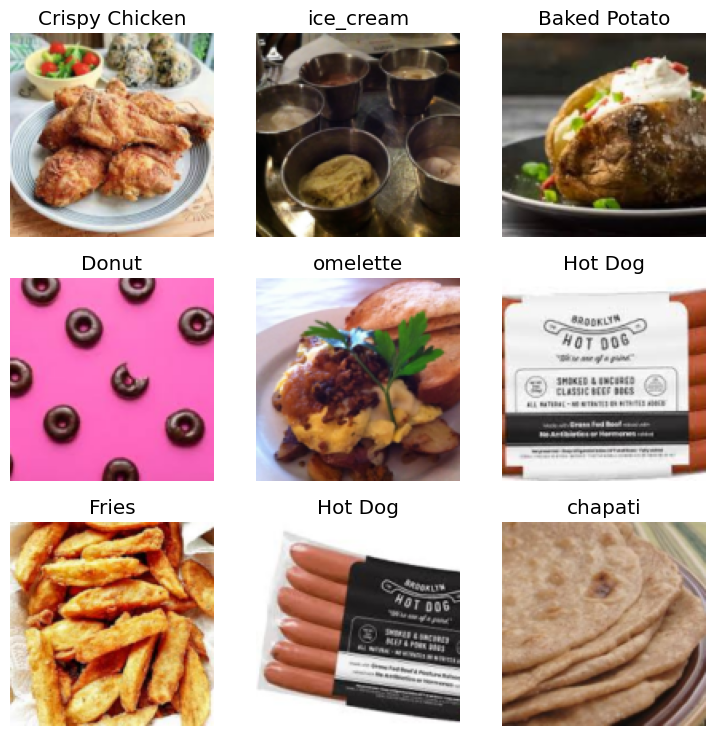

In [ ]:
dls.train.show_batch()

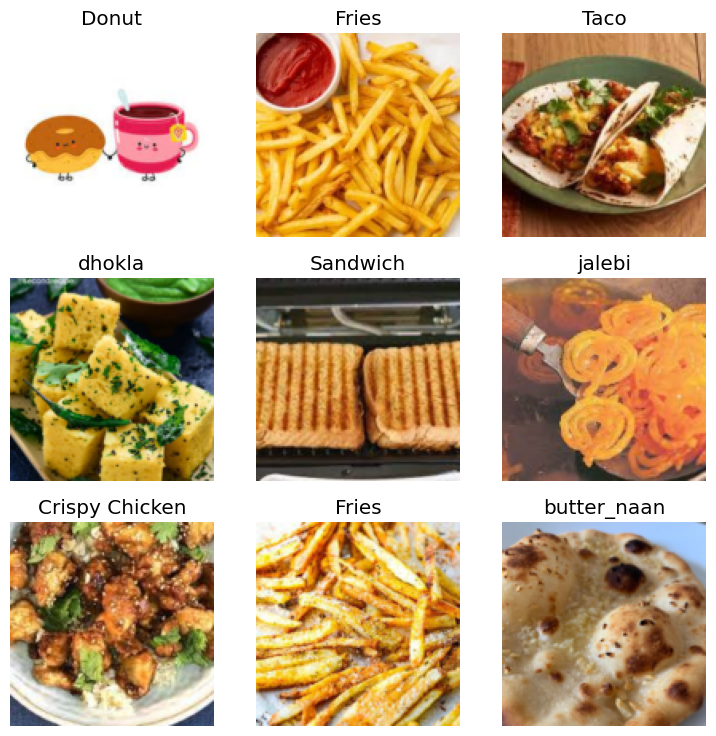

In [ ]:
dls.valid.show_batch()

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3), batch_tfms=aug_transforms())
dls = dblock.dataloaders(dataset_path, bs=bs)

In [ ]:
torch.save(dls, f"food(virsion).pkl")

In [ ]:
import torchvision # Import torchvision

In [ ]:
model = vision_learner(dls, torchvision.models.resnet50, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 150MB/s]


In [ ]:
model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.744855,1.264166,0.361123,0.638877,04:34


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.001269,0.679692,0.211982,0.788018,04:41
1,0.785335,0.503250,0.155425,0.844575,04:39
2,0.617930,0.421248,0.120654,0.879346,04:45
3,0.526154,0.390633,0.114370,0.885630,04:30
4,0.446720,0.371398,0.111437,0.888563,04:31


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

In [ ]:
# ... (Your model training code) ...

# Save the model
version = 1
model.export(f'food_model_v{version}.pkl') # Changed 'learn' to 'model'

# ... (Later, when you want to load the model) ...

from fastai.vision.all import load_learner

model_path = f'food_model_v{version}.pkl'
learn = load_learner(model_path)

# Now you can use 'learn' to make predictions

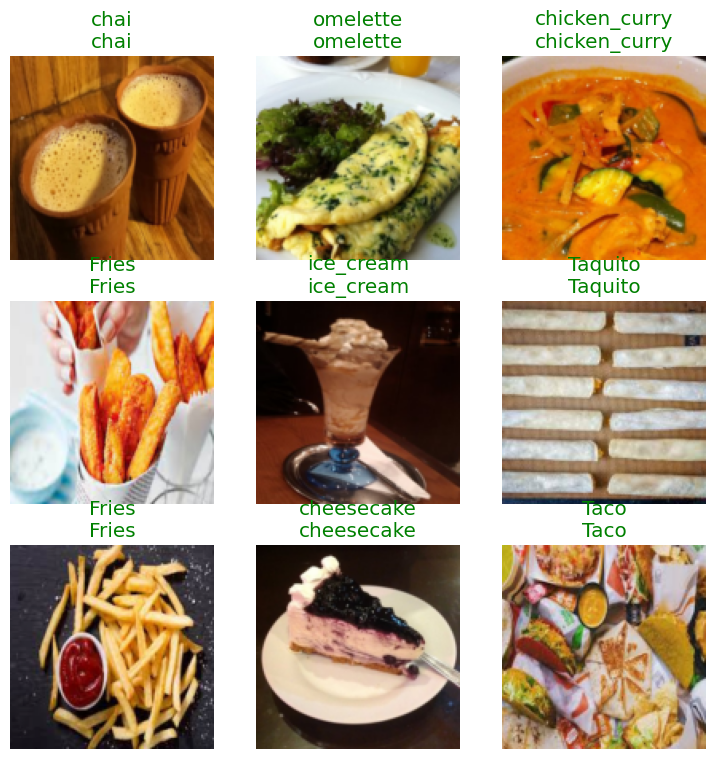

In [ ]:
model.show_results()

In [ ]:
model.export(f'food_model_v{version}.pkl')